# Project Description

While the rate of fatal road accidents has been decreasing steadily since the 80s, the past ten years have seen a stagnation in this reduction. Coupled with the increase in number of miles driven in the nation, the total number of traffic related-fatalities has now reached a ten year high and is rapidly increasing.
By looking at the demographics of traﬃc accident victims for each US state, we find that there is a lot of variation between states. Now we want to understand if there are patterns in this variation in order to derive suggestions for a policy action plan. In particular, instead of implementing a costly nation-wide plan we want to focus on groups of states with similar profiles. How can we find such groups in a statistically sound way and communicate the result effectively?


# Read in and get an overview of the data

In [9]:
import numpy as np
import pandas as pd

miles=pd.read_csv('miles-driven.csv',sep='|')
accidents=pd.read_csv('road-accidents.csv', comment ='#',sep='|')

In [10]:
accidents.head()

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
0,Alabama,18.8,39,30,80
1,Alaska,18.1,41,25,94
2,Arizona,18.6,35,28,96
3,Arkansas,22.4,18,26,95
4,California,12.0,35,28,89


In [11]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   state                 51 non-null     object 
 1   drvr_fatl_col_bmiles  51 non-null     float64
 2   perc_fatl_speed       51 non-null     int64  
 3   perc_fatl_alcohol     51 non-null     int64  
 4   perc_fatl_1st_time    51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


In [12]:
accidents.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
drvr_fatl_col_bmiles,51.0,15.790196,4.122002,5.9,12.75,15.6,18.5,23.9
perc_fatl_speed,51.0,31.725490,9.633438,13.0,23.00,34.0,38.0,54.0
perc_fatl_alcohol,51.0,30.686275,5.132213,16.0,28.00,30.0,33.0,44.0
perc_fatl_1st_time,51.0,88.725490,6.960110,76.0,83.50,88.0,95.0,100.0


In [13]:
miles.head()

,state,million_miles_annually
0,Alabama,64914
1,Alaska,4593
2,Arizona,59575
3,Arkansas,32953
4,California,320784


In [14]:
miles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   state                   51 non-null     object
 1   million_miles_annually  51 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 944.0+ bytes


In [15]:
miles.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
million_miles_annually,51.0,57851.019608,59898.414088,3568.0,17450.0,46606.0,71922.5,320784.0


In [16]:
accidents.shape

(51, 5)

In [17]:
miles.shape

(51, 2)

# Create a graphical summary of the data

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [30]:
describe = accidents.describe()
print(describe)


       drvr_fatl_col_bmiles  perc_fatl_speed  perc_fatl_alcohol  \
count             51.000000        51.000000          51.000000   
mean              15.790196        31.725490          30.686275   
std                4.122002         9.633438           5.132213   
min                5.900000        13.000000          16.000000   
25%               12.750000        23.000000          28.000000   
50%               15.600000        34.000000          30.000000   
75%               18.500000        38.000000          33.000000   
max               23.900000        54.000000          44.000000   

       perc_fatl_1st_time  
count            51.00000  
mean             88.72549  
std               6.96011  
min              76.00000  
25%              83.50000  
50%              88.00000  
75%              95.00000  
max             100.00000  


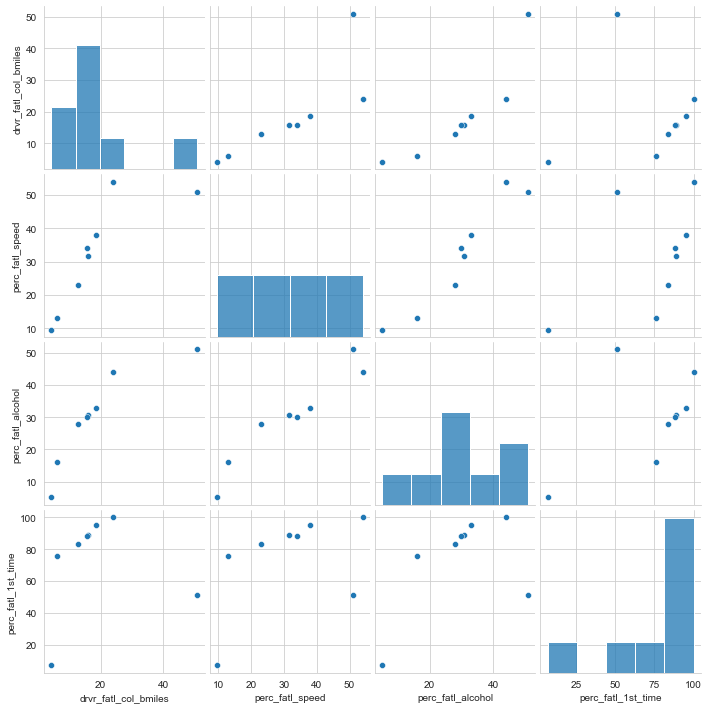

In [31]:
sns.pairplot(describe)

# Quantify the association of features and accidents

In [32]:
correlation  = accidents.corr()
correlation 

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
drvr_fatl_col_bmiles,1.000000,-0.029080,0.199426,-0.017942
perc_fatl_speed,-0.029080,1.000000,0.286244,0.014066
perc_fatl_alcohol,0.199426,0.286244,1.000000,-0.245455
perc_fatl_1st_time,-0.017942,0.014066,-0.245455,1.000000


<AxesSubplot:>

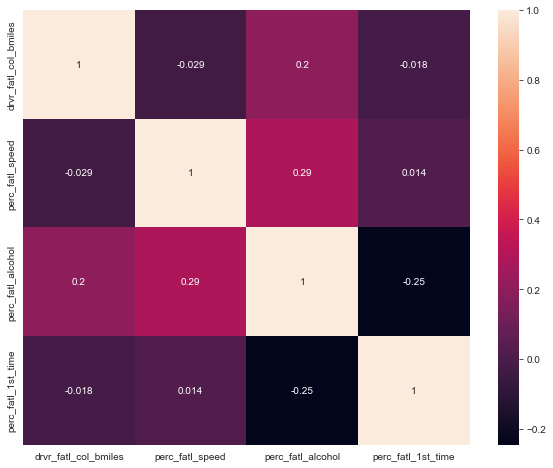

In [35]:
plt.figure(figsize=(10, 8))
sns.heatmap(data=correlation, annot=True) 

# Fit a multivariate linear regression


In [37]:
from sklearn.linear_model import LinearRegression

target = accidents['drvr_fatl_col_bmiles']
feature = accidents[['perc_fatl_speed','perc_fatl_alcohol','perc_fatl_1st_time']]

model = LinearRegression()
model.fit(feature , target)

print("Regression Coefficients")
print(model.coef_)

Regression Coefficients
[-0.04180041  0.19086404  0.02473301]


# Perform PCA on standardized data

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [52]:
scale = StandardScaler()
scaled_feature = scaler.fit_transform(feature)

In [53]:
pca = PCA()
pca.fit(scaled_feature)

PCA()

<BarContainer object of 3 artists>

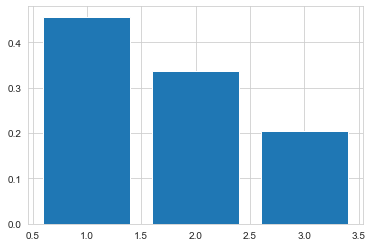

In [54]:
plt.bar(range(1, pca.n_components_ + 1),  pca.explained_variance_ratio_)


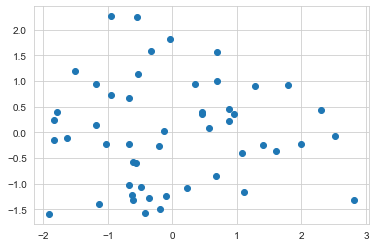

In [55]:
pca = PCA(n_components = 2)
p_comps = pca.fit_transform(scaled_feature)
p_comp2 = p_comps[:, 1]
p_comp1 = p_comps[:, 0] 
plt.scatter(p_comp1, p_comp2)